In [123]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

%matplotlib inline

In [124]:
print(cv2.__version__)

4.0.1


In [125]:
images_dir = "./../data/images"
image_files = os.listdir(images_dir)

In [299]:
image_path = "{}/{}".format(images_dir, "car_11.jpg")

In [300]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [301]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

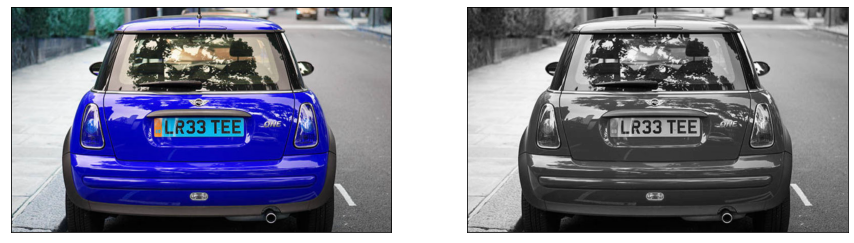

In [302]:
plot_images(image, gray)

In [303]:
blur = cv2.bilateralFilter(gray, 11,90, 90)

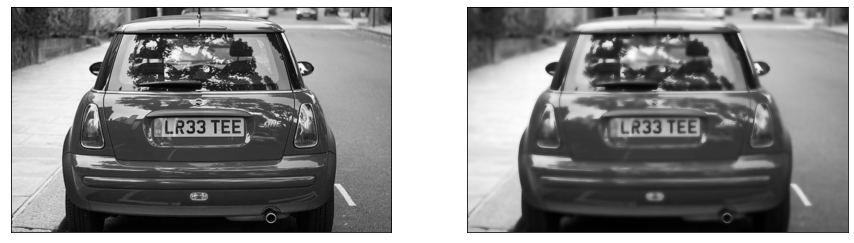

In [304]:
plot_images(gray, blur)

In [305]:
edges = cv2.Canny(blur, 30, 200)

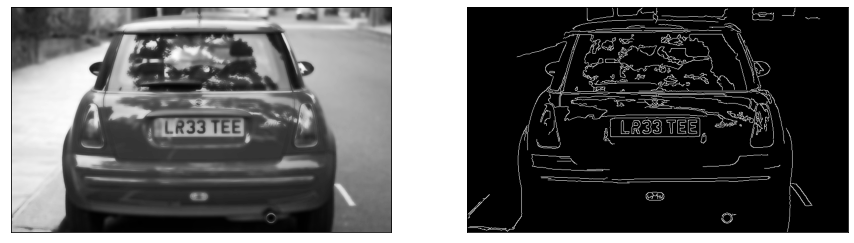

In [306]:
plot_images(blur, edges)

In [307]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [308]:
image_copy = image.copy()

In [309]:
_ = cv2.drawContours(image_copy, cnts, -1, (0,0,255),2)

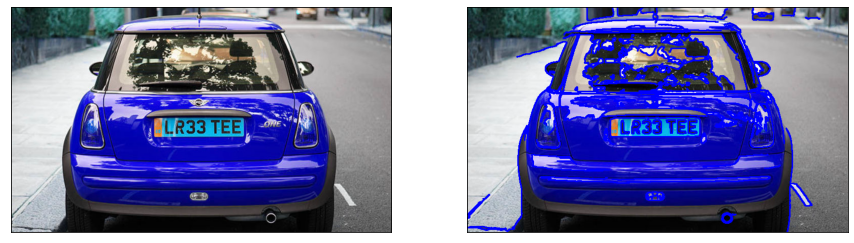

In [310]:
plot_images(image, image_copy)

In [311]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

In [312]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (0,0,255),2)

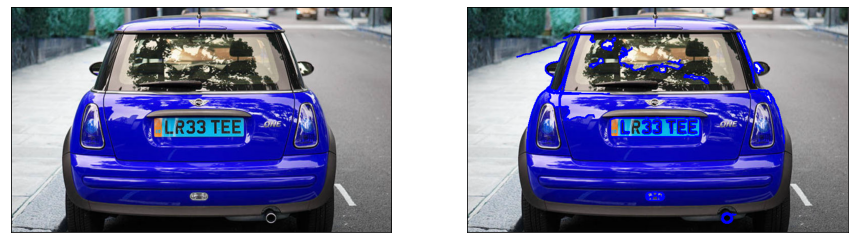

In [313]:
plot_images(image, image_copy)

In [314]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

True

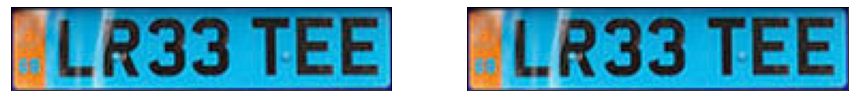

In [315]:
plot_images(plate, plate)

In [297]:

text = pytesseract.image_to_string(plate)

In [298]:
print(text)